In [347]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# TRAIN

In [348]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [349]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
1,-0.000762,3178.86960,1.584,1.412555,8.697627,0.467034,0,5,0.478848,NO
2,-0.280848,2433.71730,2.986,1.415133,5.036993,1.305065,0,1,0.616979,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
4,-0.140882,796.06140,1.530,0.716918,0.978448,0.231184,0,0,0.037146,YES
...,...,...,...,...,...,...,...,...,...,...
95,-0.019967,759.53076,2.055,0.703017,0.616965,0.424818,0,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
97,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,NO


<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

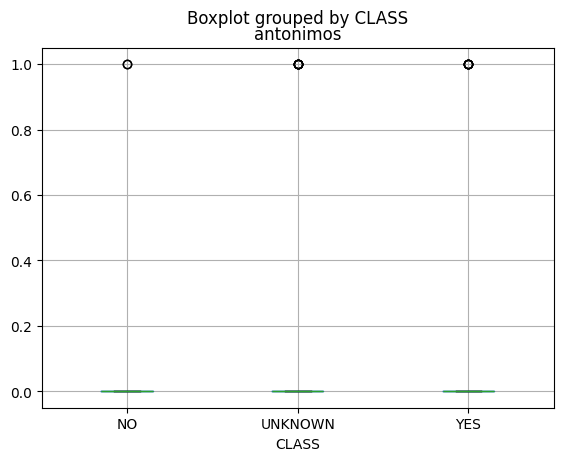

In [350]:
train.boxplot(by="CLASS",column="antonimos")

In [351]:
#train=train.drop(["entropias","antonimos"],axis=1)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
1,-0.000762,3178.86960,1.584,1.412555,8.697627,0.467034,0,5,0.478848,NO
2,-0.280848,2433.71730,2.986,1.415133,5.036993,1.305065,0,1,0.616979,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
4,-0.140882,796.06140,1.530,0.716918,0.978448,0.231184,0,0,0.037146,YES
...,...,...,...,...,...,...,...,...,...,...
95,-0.019967,759.53076,2.055,0.703017,0.616965,0.424818,0,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
97,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,NO


In [352]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [353]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [354]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

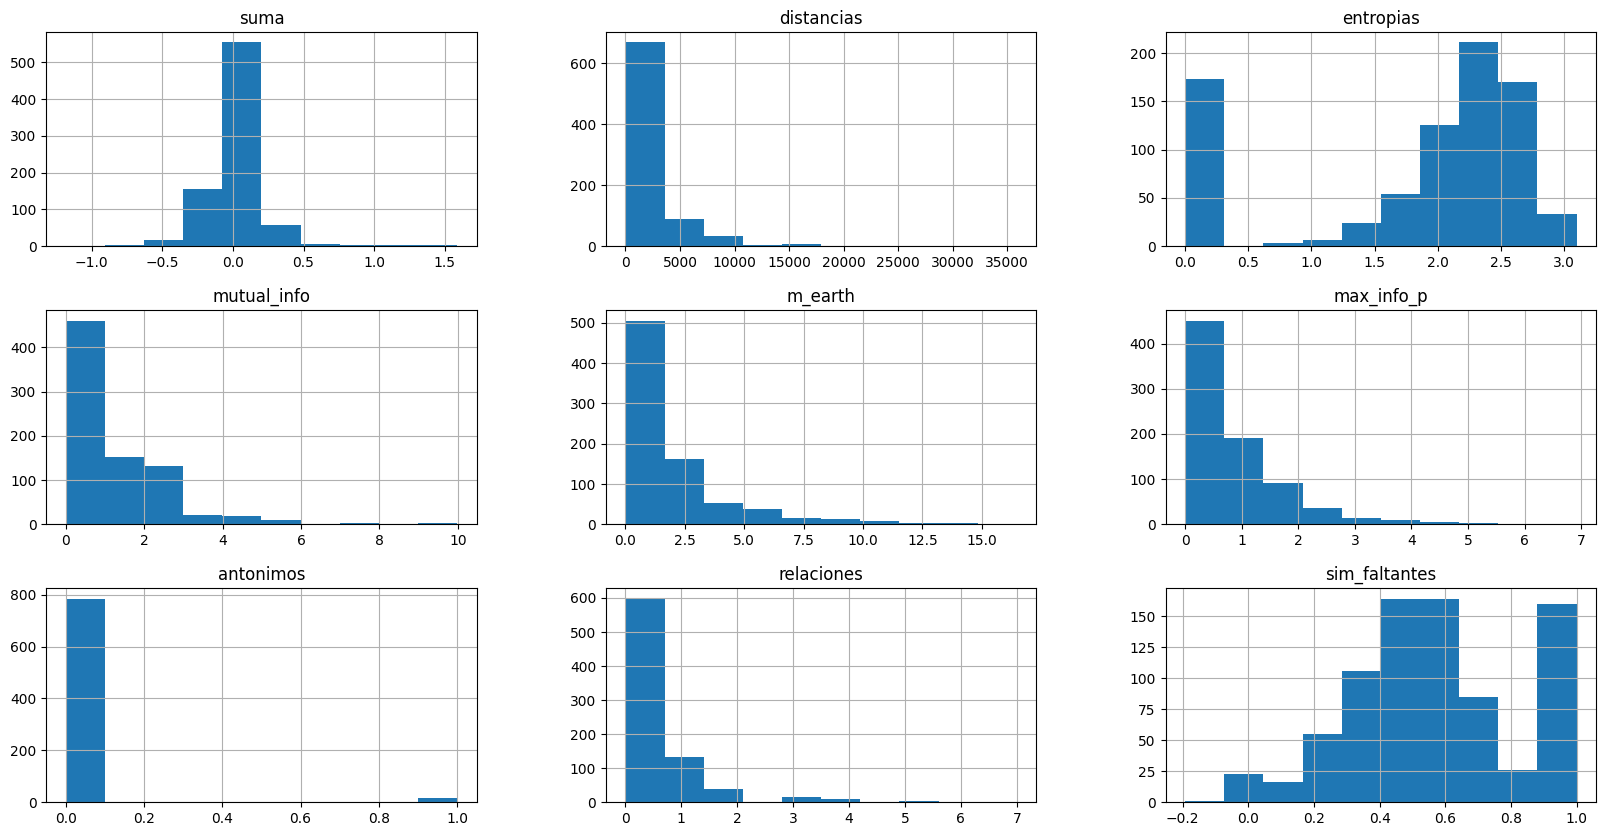

In [355]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [356]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/GHS/GHS_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/GHS/GHS_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [357]:
#test=test.drop(["entropias","antonimos"],axis=1)
test

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.109894,762.0206,2.333,1.000000,0.632621,1.000000,0,0,0.661373,ENTAILMENT
1,3.051404,10733.3170,2.540,14.564846,8.494168,8.056726,0,2,0.748418,NONENTAILMENT
2,0.141359,13162.9940,2.569,7.767979,10.491023,4.870435,0,3,0.580058,NONENTAILMENT
3,0.266062,398.2669,1.379,0.706067,0.250809,0.480053,0,1,0.595202,ENTAILMENT
4,-0.772102,13524.7350,2.735,15.845889,61.144998,8.569524,0,1,0.669552,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...
95,-0.103300,17382.8360,2.633,10.538611,12.300704,5.458198,0,0,0.515552,NONENTAILMENT
96,-0.316770,4227.6885,2.793,2.108088,7.435420,1.351854,0,0,0.486467,ENTAILMENT
97,-1.529311,25273.7030,2.642,12.651247,14.923519,6.705415,0,3,0.601806,NONENTAILMENT
98,-0.478304,18140.8650,2.651,9.837451,7.637365,5.860400,0,2,0.731537,NONENTAILMENT


In [358]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [359]:
# GHS
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [360]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [361]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [362]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [363]:
model.decision_function(X)

array([ 9.19169596e-01, -2.46346674e-01,  2.12198470e-01,  9.19169596e-01,
        7.77996257e-02,  5.37124313e-01,  9.19169596e-01,  9.19169596e-01,
       -1.19026420e-02, -1.06066929e+00,  1.14705533e-01,  9.19169596e-01,
        2.92529893e-01,  4.67845378e-01,  5.89567392e-01,  9.19169596e-01,
       -3.97337594e-01,  4.15016067e-01,  4.95185585e-01,  4.05886116e-01,
        4.29029349e-01,  2.48319426e-01,  6.01156659e-01,  4.41959633e-01,
       -6.53062173e-02,  2.56901010e-01,  3.31267547e-01,  2.90548120e-01,
        2.73723580e-01,  3.75435868e-01,  4.86650439e-01,  2.28674087e-01,
        2.67187216e-01,  3.49031785e-01,  3.87807563e-01,  2.45525525e-01,
        3.25258743e-01,  5.43437574e-01,  3.52237033e-01,  9.19169596e-01,
        3.88641267e-01,  3.15386173e-01, -7.20720774e-01,  4.49026496e-01,
        3.82350353e-01,  3.47350955e-01,  3.38729562e-01,  4.17661429e-01,
        3.57950998e-01,  4.70381167e-01, -1.32207119e-01,  4.79535093e-01,
       -8.20886049e-01,  

In [364]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes'],
      dtype='object')

In [365]:
model.classes_

array([0, 1])

In [366]:
model.coef_[0]

array([ 8.11433346e-02, -9.79483587e-02, -4.43902249e-02, -1.57747368e+00,
        2.77822302e-01,  6.39142414e-01,  6.08188937e-04, -9.58415110e-02,
        2.15830812e-02])

In [367]:
coeficientes=model.coef_[0]

In [368]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  5 max_info_p 3 mutual_info


In [369]:
n_columns=train.shape[1]-1

In [370]:
n_columns

9

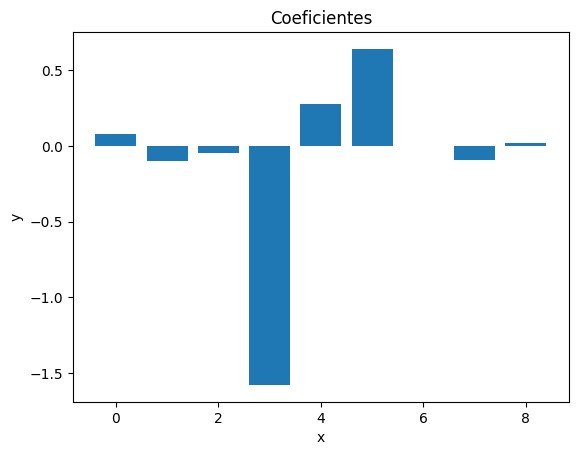

In [371]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [372]:
predictions = model.predict(X_test)

In [373]:
print(confusion_matrix(y_test, predictions))

[[326  75]
 [  1 398]]


In [374]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.9
precision:  0.84
recall 1.0
f1_score:  0.91
matthews_score:  0.82


In [375]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [376]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [377]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.760000 (0.048539)


In [378]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.880000 (0.056937)


In [379]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.810000 (0.037871)


In [380]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.590000 (0.089541)


In [381]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [382]:
model = linear_model.LogisticRegression().fit(X_train,y_train)

In [383]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer.shap_values(X_test)

In [384]:
explainer.expected_value

-0.09921962496366696

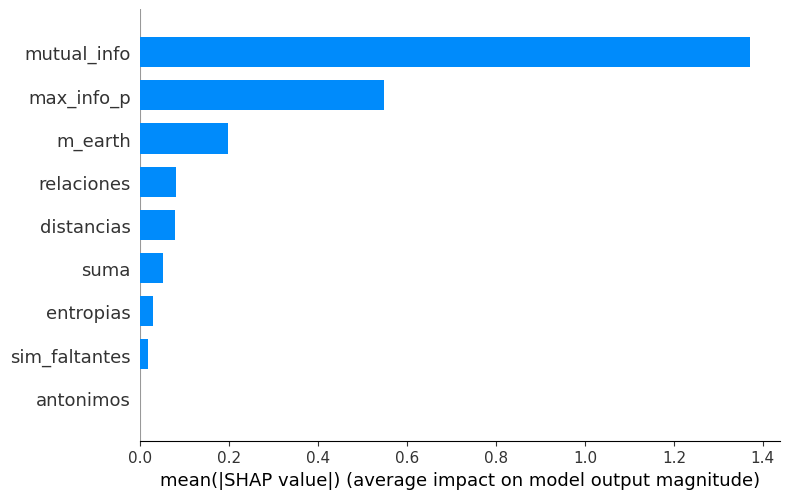

In [385]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1],plot_type="bar")